In [136]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [137]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

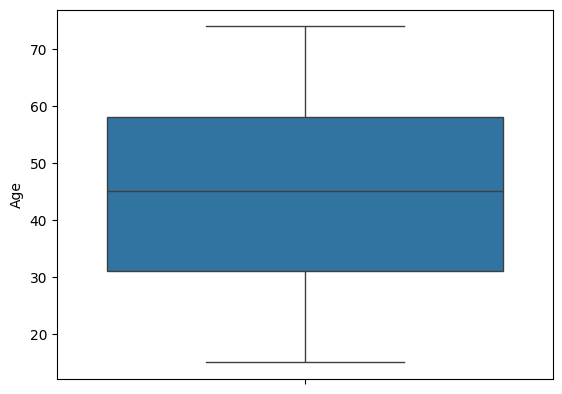

In [138]:
sns.boxplot(df['Age'])
plt.show()

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [140]:
cat_cols = df[['Sex','BP','Cholesterol','Drug']]
cat_cols

,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,DrugY
1,M,LOW,HIGH,drugC
2,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX
4,F,LOW,HIGH,DrugY
...,...,...,...,...
195,F,LOW,HIGH,drugC
196,M,LOW,HIGH,drugC
197,M,NORMAL,HIGH,drugX
198,M,NORMAL,NORMAL,drugX


In [141]:
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])
cat_cols

,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,DrugY
1,M,LOW,HIGH,drugC
2,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX
4,F,LOW,HIGH,DrugY
...,...,...,...,...
195,F,LOW,HIGH,drugC
196,M,LOW,HIGH,drugC
197,M,NORMAL,HIGH,drugX
198,M,NORMAL,NORMAL,drugX


In [142]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


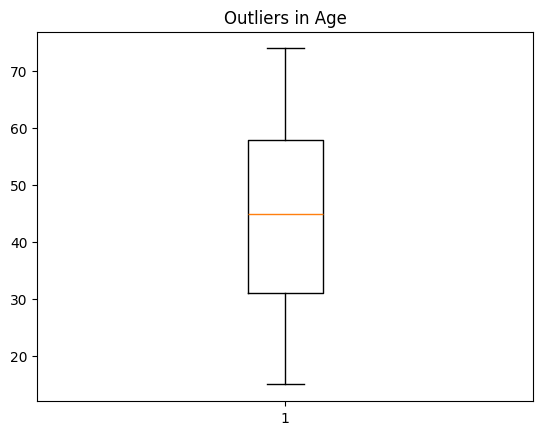

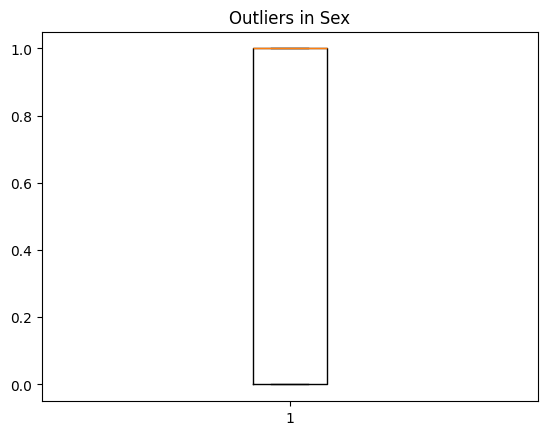

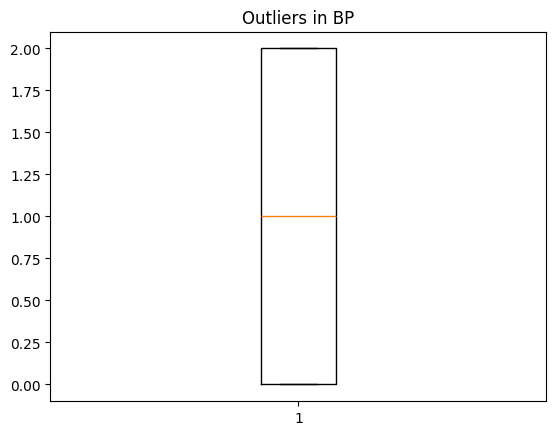

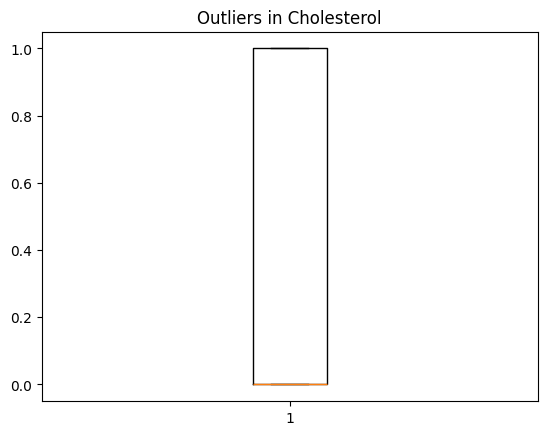

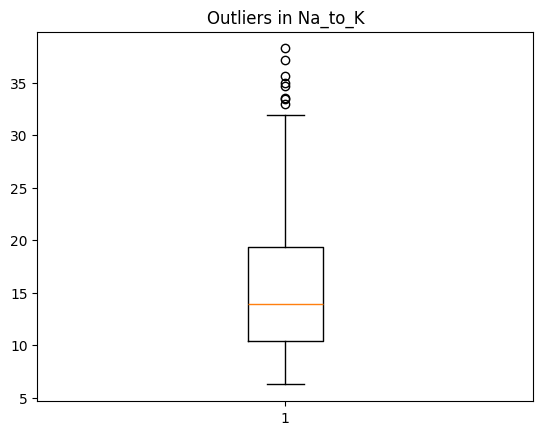

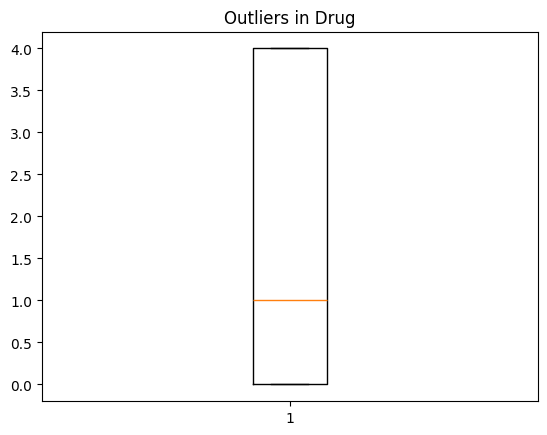

In [143]:
for x in df:
    plot = plt.boxplot(df[x])
    plt.title(f'Outliers in {x}')
    plt.show()

In [144]:
def replace_outlier_with_mean(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bounds = q1 - 1.5 * iqr
    upper_bounds = q3 + 1.5 * iqr
    column[(column < lower_bounds) | (column > upper_bounds)] = column.mean()
    return column

In [145]:
column_to_replace =['Na_to_K']
df[column_to_replace] = df[column_to_replace].apply(replace_outlier_with_mean)

In [146]:
column_to_replace =['Sex']
df[column_to_replace] = df[column_to_replace].apply(replace_outlier_with_mean)

In [147]:
column_to_replace =['BP']
df[column_to_replace] = df[column_to_replace].apply(replace_outlier_with_mean)

In [148]:
column_to_replace =['Cholesterol']
df[column_to_replace] = df[column_to_replace].apply(replace_outlier_with_mean)

In [149]:
column_to_replace =['Drug']
df[column_to_replace] = df[column_to_replace].apply(replace_outlier_with_mean)

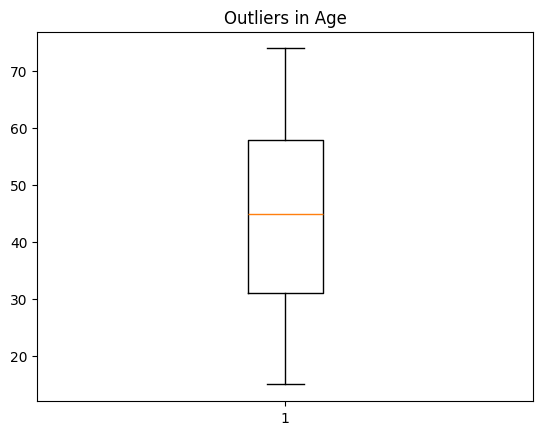

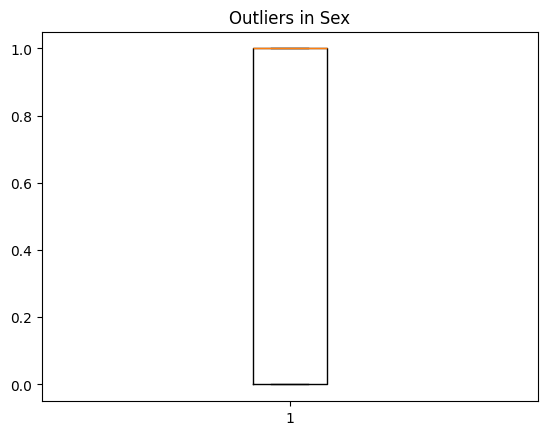

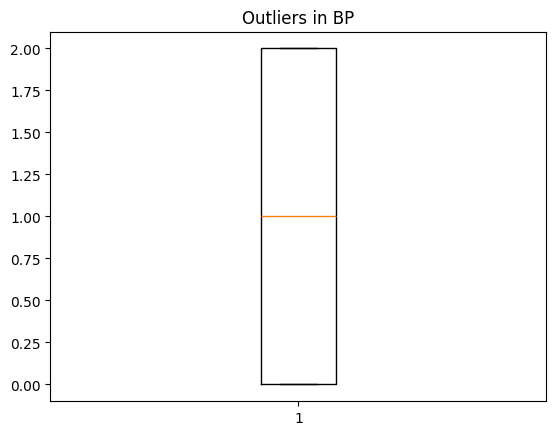

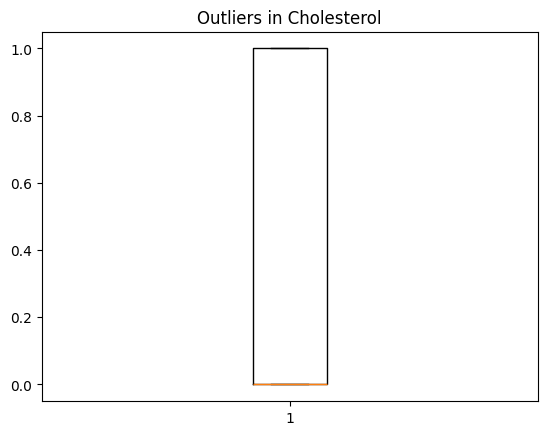

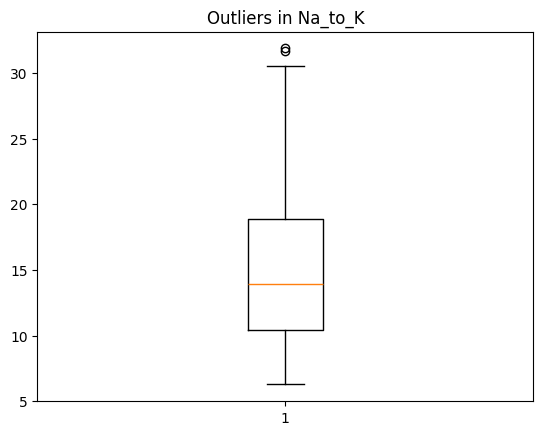

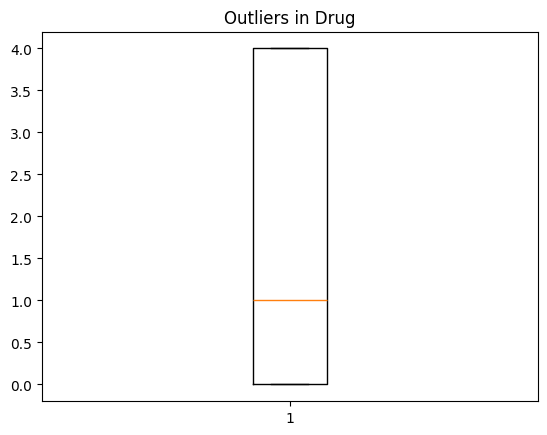

In [150]:
for x in df:
    plot = plt.boxplot(df[x])
    plt.title(f'Outliers in {x}')
    plt.show()

In [151]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [152]:
x = df.drop(['Drug'],axis = 1)
y = df['Drug']

In [153]:
y

0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int32

In [154]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [155]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.3, random_state = 50)

In [156]:
model = MLPClassifier(hidden_layer_sizes = (20,10), max_iter = 300, solver ='lbfgs', activation = 'relu', random_state = 300)

In [157]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [158]:
model.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=300, random_state=300,
              solver='lbfgs')

In [159]:
y_pred = model.predict(x_test)
y_pred

array([4, 0, 0, 0, 1, 0, 4, 0, 4, 0, 4, 4, 0, 4, 0, 0, 2, 0, 1, 4, 0, 3,
       0, 1, 1, 1, 0, 4, 0, 4, 0, 0, 0, 4, 4, 3, 4, 2, 0, 2, 4, 0, 4, 4,
       0, 0, 0, 0, 0, 0, 3, 4, 1, 0, 0, 0, 0, 2, 1, 4])

In [160]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9833333333333333

In [161]:
print('Actual values :',y_test)
print('Predicted values :',y_pred)
print('Accuracy of model :',accuracy)

Actual values : 112    4
165    0
12     0
73     0
144    1
20     0
199    4
8      0
39     4
88     0
81     4
197    4
69     0
160    4
25     0
99     0
151    2
23     0
138    2
159    4
89     0
82     3
24     0
174    1
137    1
83     1
107    0
34     4
97     0
167    4
123    0
157    0
75     0
152    4
117    4
149    3
63     4
54     2
125    0
80     2
170    4
183    0
38     4
153    4
40     0
190    0
177    0
131    0
13     0
121    0
1      3
116    4
100    1
166    0
168    0
48     0
178    0
108    2
61     1
16     4
Name: Drug, dtype: int32
Predicted values : [4 0 0 0 1 0 4 0 4 0 4 4 0 4 0 0 2 0 1 4 0 3 0 1 1 1 0 4 0 4 0 0 0 4 4 3 4
 2 0 2 4 0 4 4 0 0 0 0 0 0 3 4 1 0 0 0 0 2 1 4]
Accuracy of model : 0.9833333333333333
